In [1]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = DATA_PATH + '/total_congress.csv'



In [3]:
df_raw_data = pd.read_csv(RAW_PATH)
df_raw_data.info()

df_raw_data.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6117 non-null   int64  
 1   station_name        6117 non-null   int64  
 2   time                6117 non-null   object 
 3   holiday             6117 non-null   bool   
 4   day_week            6117 non-null   object 
 5   weekend             6117 non-null   bool   
 6   temperature         6109 non-null   float64
 7   humid               6109 non-null   float64
 8   precipitation       6109 non-null   float64
 9   precipitation_type  6109 non-null   float64
 10  year                6117 non-null   int64  
 11  month               6117 non-null   int64  
 12  day                 6117 non-null   int64  
 13  hour                6117 non-null   int64  
 14  minute              6117 non-null   int64  
 15  total_car_num       6117 non-null   int64  
dtypes: boo

Unnamed: 0            0
station_name          0
time                  0
holiday               0
day_week              0
weekend               0
temperature           8
humid                 8
precipitation         8
precipitation_type    8
year                  0
month                 0
day                   0
hour                  0
minute                0
total_car_num         0
dtype: int64

In [4]:
df_raw_data.dropna(axis = 0, inplace= True)
df_raw_data.info()

df_raw_data.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
df_raw_data.info()

df_raw_data.drop('time', axis=1, inplace = True)
df_raw_data.info()


df_raw_data['day_week'].replace('mon', 0, inplace = True)
df_raw_data['day_week'].replace('tue', 1, inplace = True)
df_raw_data['day_week'].replace('wen', 2, inplace = True)
df_raw_data['day_week'].replace('thu', 3, inplace = True)
df_raw_data['day_week'].replace('fri', 4, inplace = True)
df_raw_data['day_week'].replace('sat', 5, inplace = True)
df_raw_data['day_week'].replace('sun', 6, inplace = True)

df_raw_data['holiday'] = df_raw_data['holiday'].astype(int)
df_raw_data['weekend'] = df_raw_data['weekend'].astype(int)


df_raw_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6109 entries, 0 to 6116
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6109 non-null   int64  
 1   station_name        6109 non-null   int64  
 2   time                6109 non-null   object 
 3   holiday             6109 non-null   bool   
 4   day_week            6109 non-null   object 
 5   weekend             6109 non-null   bool   
 6   temperature         6109 non-null   float64
 7   humid               6109 non-null   float64
 8   precipitation       6109 non-null   float64
 9   precipitation_type  6109 non-null   float64
 10  year                6109 non-null   int64  
 11  month               6109 non-null   int64  
 12  day                 6109 non-null   int64  
 13  hour                6109 non-null   int64  
 14  minute              6109 non-null   int64  
 15  total_car_num       6109 non-null   int64  
dtypes: boo

,Unnamed: 0,station_name,holiday,day_week,weekend,temperature,humid,precipitation,precipitation_type,year,month,day,hour,minute,total_car_num
0,0,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,20,2
1,1,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,38,3
2,2,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,45,4
3,3,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,50,4
4,4,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,55,4


In [5]:
X, y = df_raw_data.iloc[:,2:-1].values, df_raw_data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[ 1.  5.  1. ...  3. 17. 25.]
 [ 0.  2.  0. ...  9. 17. 25.]
 [ 1.  4.  0. ...  2.  8. 45.]
 ...
 [ 0.  2.  0. ... 14.  9.  5.]
 [ 0.  3.  0. ... 15. 11. 35.]
 [ 0.  1.  0. ... 13.  8.  5.]]
X_test : [[ 0.  3.  0. ... 24. 21. 46.]
 [ 1.  4.  0. ...  9. 22.  5.]
 [ 0.  0.  0. ...  5. 15. 15.]
 ...
 [ 0.  2.  0. ... 14. 21. 30.]
 [ 0.  5.  1. ... 10. 18. 50.]
 [ 1.  5.  1. ...  3. 13. 40.]]
y_train : [3 2 3 ... 3 0 0]
y_test : [4 0 3 ... 2 3 1]


(4886, 12)
(1222, 12)
(4886,)
(1222,)


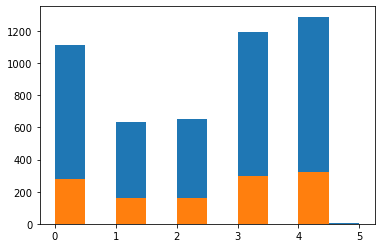

<AxesSubplot:ylabel='count'>

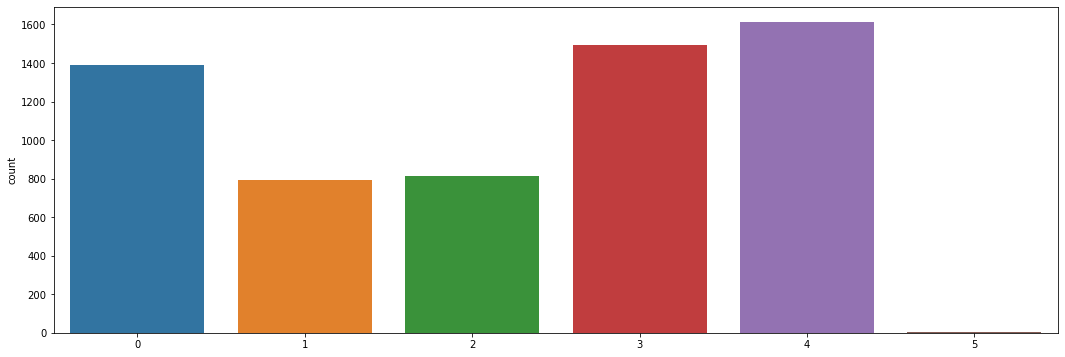

In [6]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape)

plt.hist(y_train, bins=10)
plt.hist(y_test, bins=10)
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)
plt.sca(ax1)
sns.countplot(x = y, ax = ax1)

/home/h2/anaconda3/envs/yolov4-cpu/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


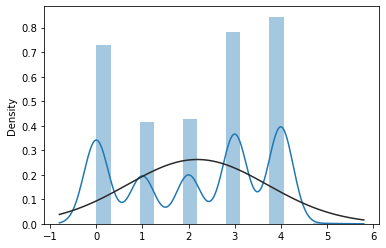

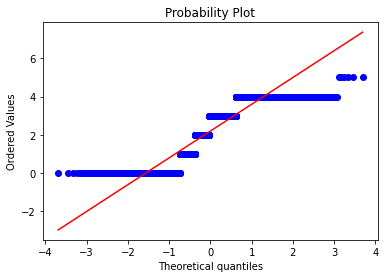

In [7]:
from scipy.stats import norm
from scipy import stats

sns.distplot(y, fit= norm)
fig = plt.figure()
res = stats.probplot(y, plot = plt)

In [8]:
max_depth_list = []

model = RandomForestRegressor(n_estimators = 100,
                              n_jobs = -1,
                              random_state = 0)


In [9]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
print(y_train_pred)
print(y_test_pred)

[2.7  1.93 3.04 ... 2.82 0.3  0.76]
[3.04 0.94 3.71 ... 1.47 3.27 1.51]


In [12]:
print('train MSE : %.3f, test MSE: %.3f' % (
    mean_squared_error(y_train,y_train_pred), 
    mean_squared_error(y_test,y_test_pred)
))

train MSE : 0.069, test MSE: 0.490


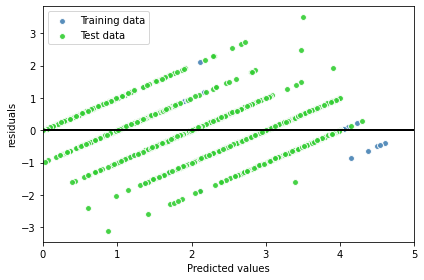

In [13]:
plt.scatter(y_train_pred, 
           y_train_pred - y_train,
           c= 'steelblue',
           edgecolor = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9,
           label = 'Training data')

plt.scatter(y_test_pred, 
           y_test_pred - y_test,
           c= 'limegreen',
           edgecolor = 'white',
           marker = 'o',
           s = 35 ,
           alpha = 0.9,
           label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('residuals')
plt.legend(loc = 'upper left')
plt.hlines(y =0, xmin = 0, xmax = 5, lw = 2, color = 'black')
plt.xlim ([0, 5])
plt.tight_layout()
plt.show()

/home/h2/anaconda3/envs/yolov4-cpu/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/h2/anaconda3/envs/yolov4-cpu/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'test'), (-1.0, 6.0), (0.0, 0.6)]

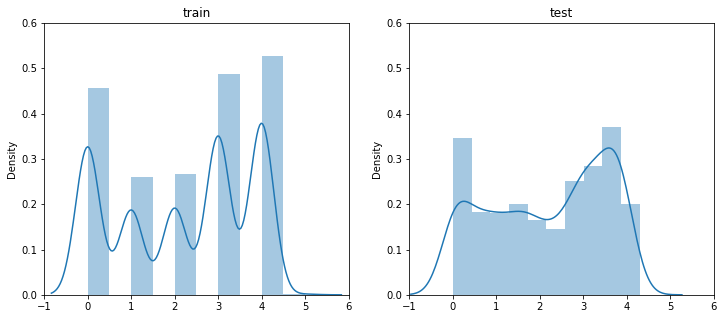

In [14]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=10)
ax1.set(title="train", xlim = ([-1, 6]), ylim = ([0, 0.6]))
sns.distplot(y_test_pred,ax=ax2,bins=10)
ax2.set(title="test", xlim = ([-1, 6]), ylim = ([0, 0.6]))